In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("C:\\Users\\USER\\Downloads\\kc_house_data.csv")

In [65]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [66]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [68]:
df.shape

(21613, 21)

In [69]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Fix data types :

In [70]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [3]:
#Fix the columns type
df['bathrooms']=df['bathrooms'].astype(int)
df['floors']=df['floors'].astype(int)
df['date']=pd.to_datetime(df['date'])

<Axes: >

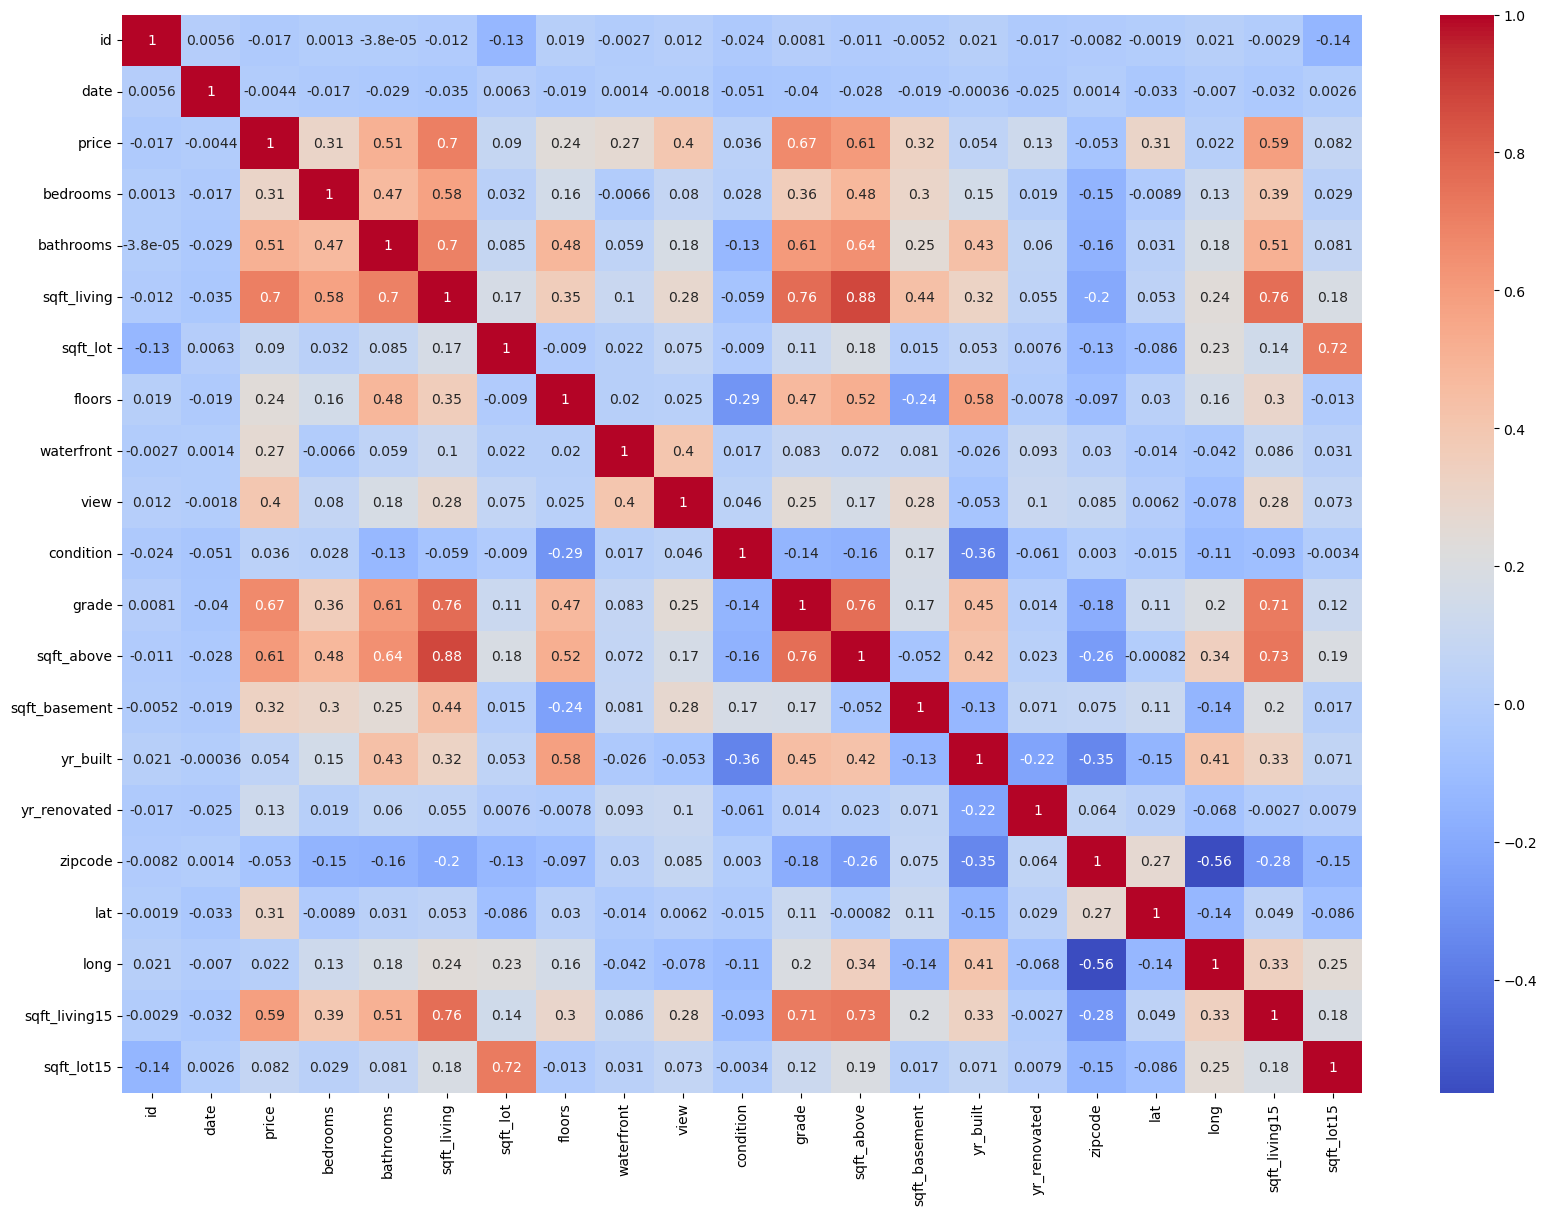

In [72]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

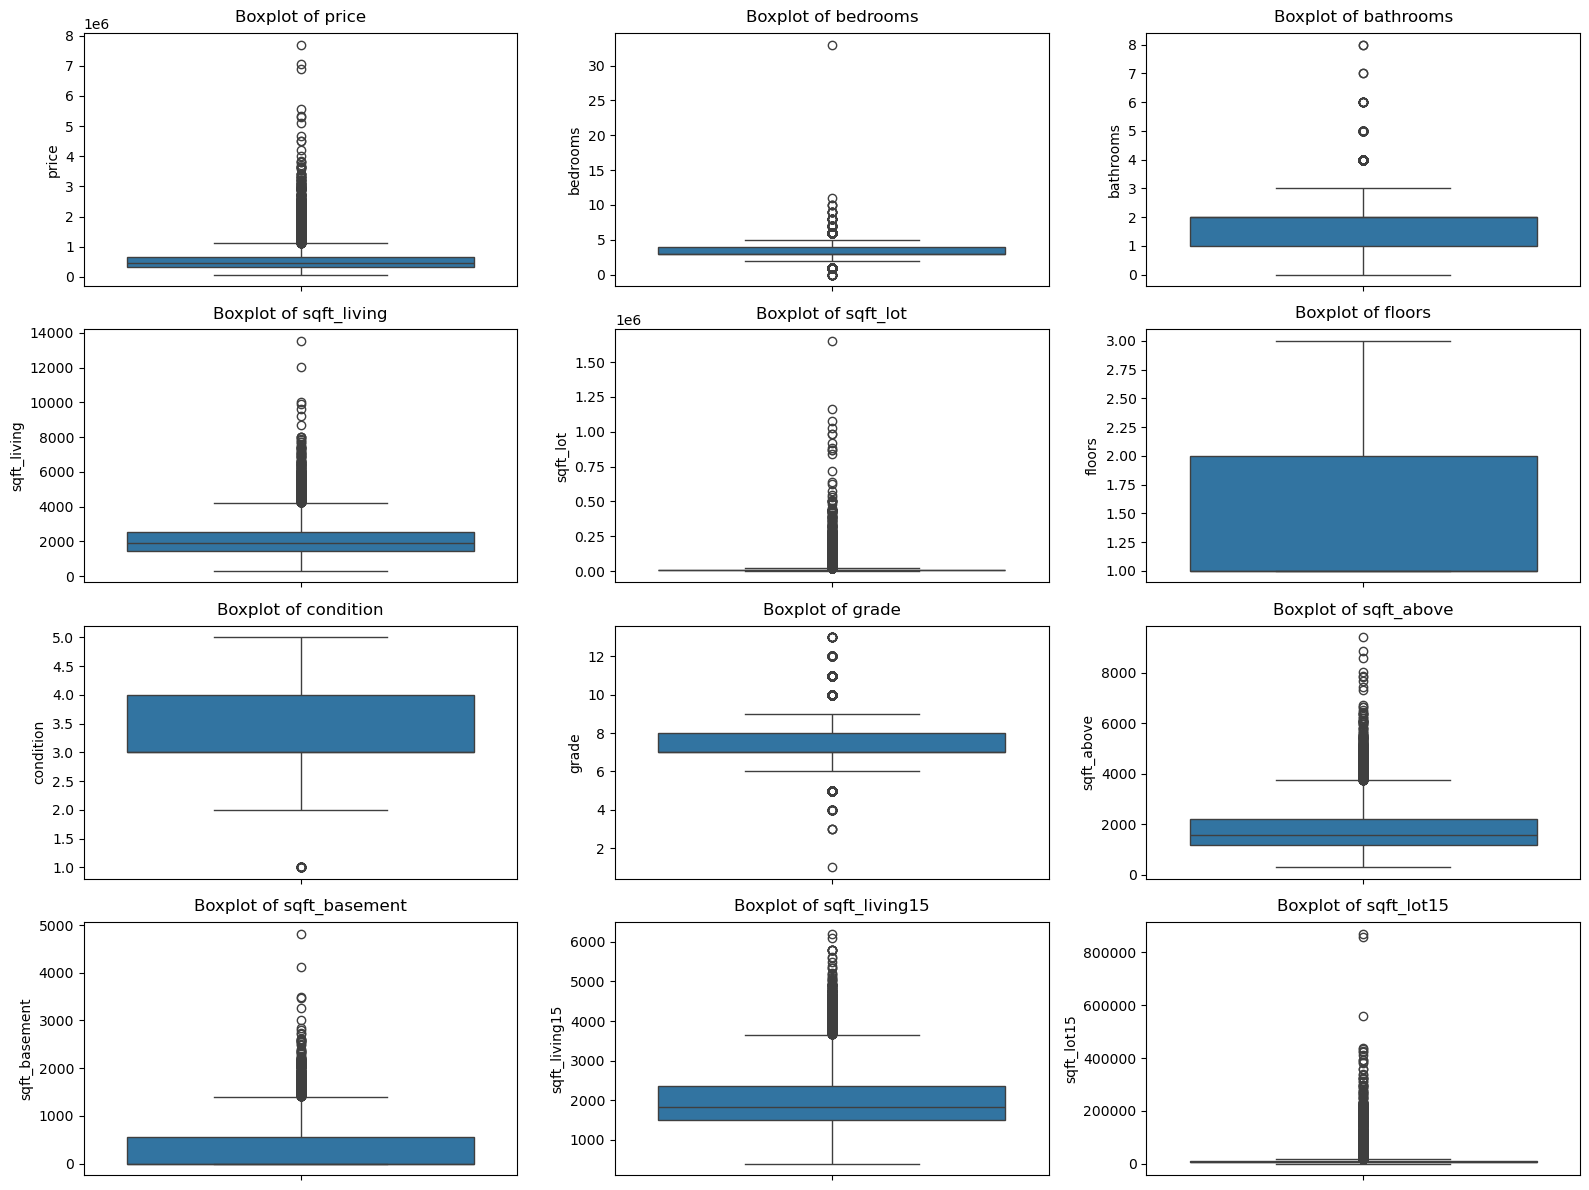

In [73]:
# Visualize outliers before handling
plt.figure(figsize=(16, 12))
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}', fontsize=12, pad=8)
    plt.ylabel(col, fontsize=10)
plt.tight_layout()

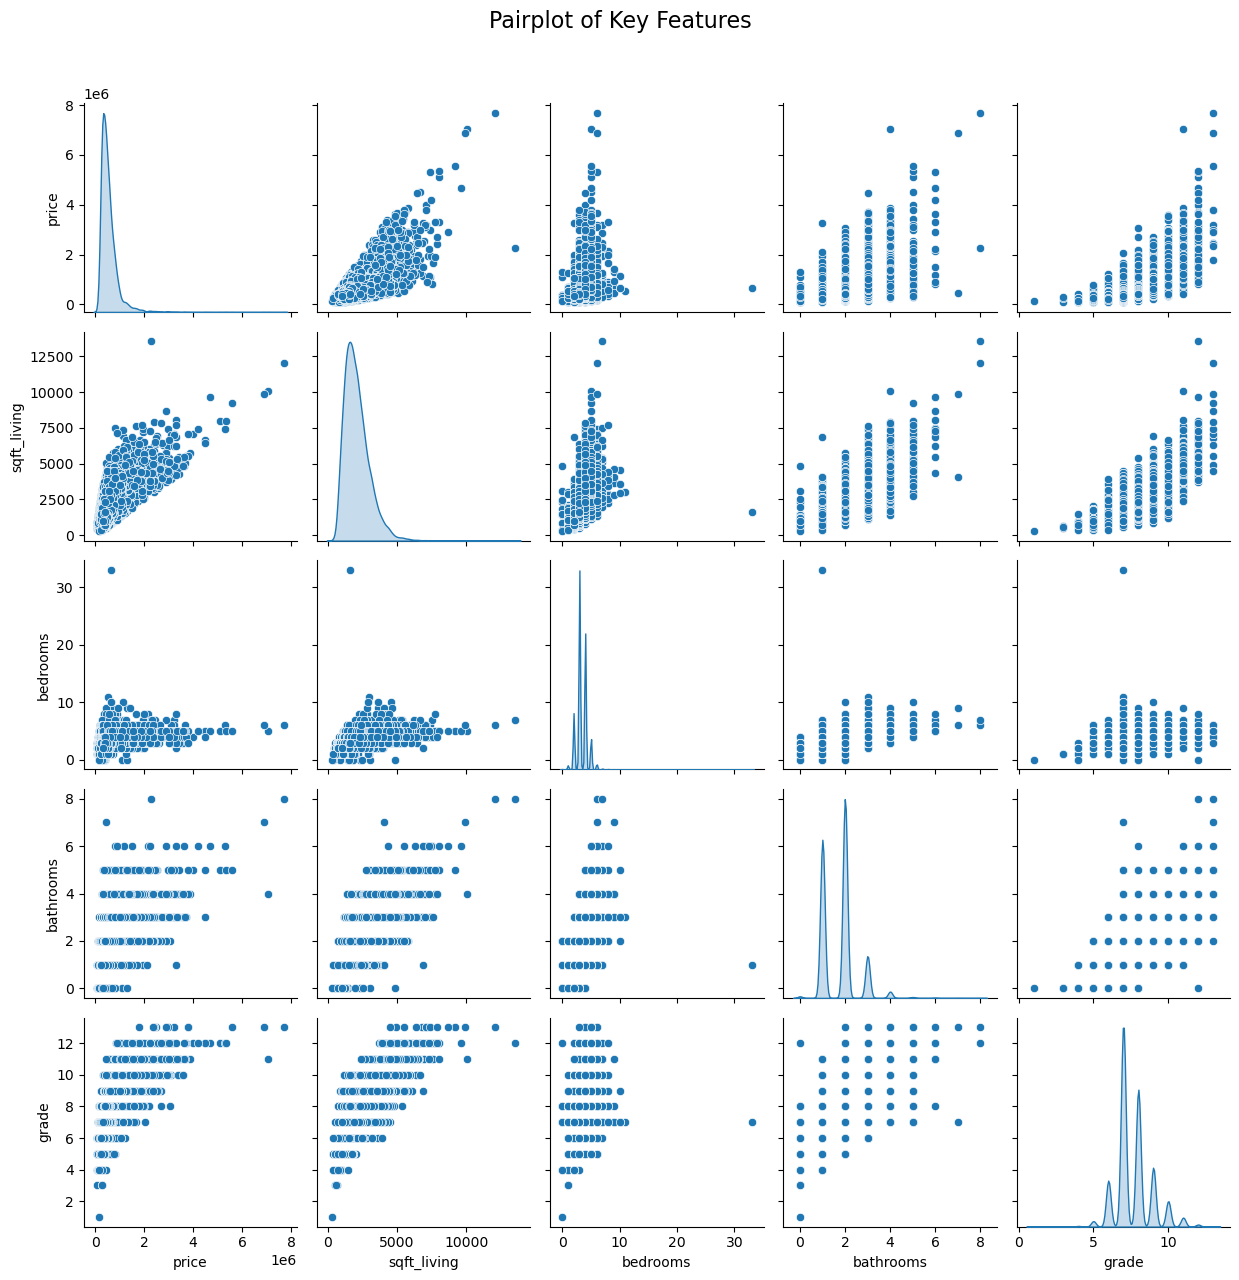

In [74]:
key_features = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade']
sns.pairplot(df[key_features], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', fontsize=16, y=1.02)
plt.tight_layout()

C:\Users\USER\AppData\Local\Temp\ipykernel_15508\4125643036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='price', data=df, palette="Paired")


Text(0, 0.5, 'Price ($)')

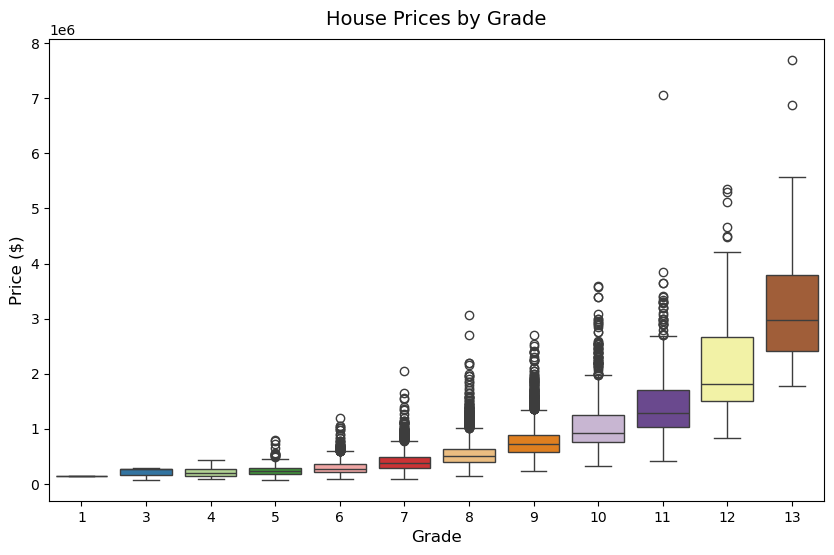

In [4]:
# Price by grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=df, palette="Paired")
plt.title('House Prices by Grade', fontsize=14, pad=10)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)


C:\Users\USER\AppData\Local\Temp\ipykernel_13768\473913160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bedrooms', y='price', data=df, palette="Set1")


Text(0, 0.5, 'Price ($)')

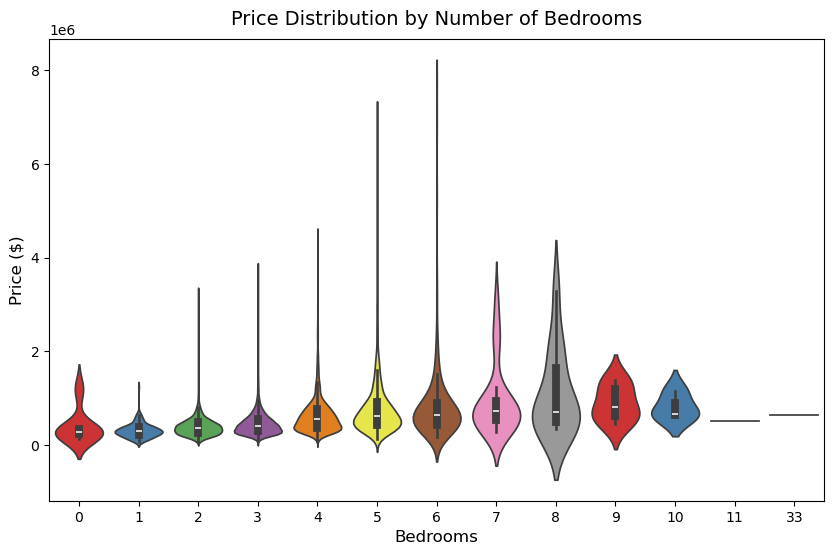

In [76]:
# Price distribution by bedrooms
plt.figure(figsize=(10, 6))
sns.violinplot(x='bedrooms', y='price', data=df, palette="Set1")
plt.title('Price Distribution by Number of Bedrooms', fontsize=14, pad=10)
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

In [5]:
#Handle outliers in price and bedrooms using IQR method
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
df = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]

In [6]:
#Handle outliers in bedrooms using IQR method
Q1_bedrooms = df['bedrooms'].quantile(0.25)
Q3_bedrooms = df['bedrooms'].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms
df = df[df['bedrooms'] <= upper_bound_bedrooms]

In [7]:
# Drop irrelevant columns
df = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)

In [8]:
# Create new feature: house age
df['house_age'] = 2025 - df['yr_built']

# Create new feature: renovated or not
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Create new feature: lot size ratio (sqft_lot / sqft_lot15)
df['lot_size_ratio'] = df['sqft_lot'] / df['sqft_lot15']

In [9]:
# Drop original year columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)

In [10]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age', 'lot_size_ratio']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [11]:
# Split data into features and target
X = df.drop('price', axis=1)
y = df['price']

In [14]:
# Split into training and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Train the model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Prediction
y_pred = ridge.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
mae = mean_absolute_error(y_test, y_pred)

print("Ridge RMSE:", rmse)
print("Ridge MAE:", mae)

Ridge RMSE: 135066.51888949354
Ridge MAE: 106662.13129089396


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE:", mae_rf)

Random Forest RMSE: 123505.96790577931
Random Forest MAE: 95960.32498160638


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost
xgbr = xgb.XGBRegressor(
    objective='reg:squarederror',  # regression
    n_estimators=100,               # nbr trees
    learning_rate=0.1,              
    max_depth=5,                     
    random_state=42
)

# Train the model
xgbr.fit(X_train, y_train)

# prediction
y_pred_xgb = xgbr.predict(X_test)

# Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost MAE:", mae_xgb)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Select algorithms
estimators = [
    ('ridge', Ridge(alpha=1.0)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42))
]

# Stacking model with Ridge as meta-model
stack = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=1.0)
)

# Train Stacking model
stack.fit(X_train, y_train)

# prediction and evaluating
y_pred_stack = stack.predict(X_test)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
mae_stack = mean_absolute_error(y_test, y_pred_stack)

print("Stacking RMSE:", rmse_stack)
print("Stacking MAE:", mae_stack)
